In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from DisplaysFast import phase_retrie_plots
import imageio

In [2]:
def plot_im(x):

    fig = plt.figure(figsize=(16,12))

    axs01 = plt.subplot2grid((2,3), (0,1))
    im01 = axs01.imshow(x.real,  cmap='gray')
    axs01.set_title('Real Part')
    plt.colorbar(im01, ax = axs01)
    axs01.axis('off')
    axs11 = plt.subplot2grid((2,3), (1,1))
    im11 = axs11.imshow(x.imag,  cmap='gray')
    plt.colorbar(im11, ax = axs11)
    axs11.set_title('Imaginary Part')
    axs11.axis('off')

In [3]:
half_Nx, half_Ny = 64, 64 #half image shape
Nx, Ny = 2 * half_Nx + 1,  2 * half_Ny + 1 #image shape
rx, ry = 1, 1 #for oversampling
n = Nx * Ny #image size

# object support
Kx = 4 * (half_Nx)// 10 # half_Nx #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).  
Ky = 4 * (half_Ny)// 10 # half_Ny #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).

# mask support
tx = 0.0 #parameter between 0 (very precise) and 1(no support knowledge) # 0.35  failed already
ty = 0.0 #parameter between 0 (very precise) and 1(no support knowledge)  

#true_images = setUpImage(Nx, Ny)
s = setUpImage(Nx, Ny, Kx, Ky, tx, ty)

true_images, mask = s()
#print(mask.shape)


In [4]:
#map.f(x_true) < 1e-5
len(true_images)
#plt.imshow(true_images[-1].real, cmap='gray') #, origin='lower' #true_images[3].imag #mask.real #np.maximum(true_images[].real, mask.real)
#plt.colorbar()
# Charger l'image et convertir en matrice numpy
# Conversion en niveaux de gris
image = true_images[0].real
matrix = np.array(image)
x = matrix

X = np.fft.fft2(x)
#y, z =  
#Y, Z = np.meshgrid()
P = np.fft.fftshift(np.angle(X))
#plt.imshow((X.imag))
#plt.colorbar()
#plt.imshow(np.fft.ifftshift(x))
#plt.imshow(np.angle(X))

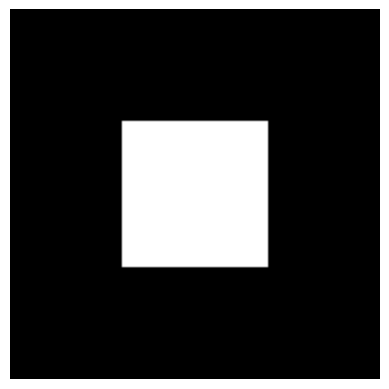

In [5]:
# Obtenir les dimensions de l'image
height, width = matrix.shape

# Créer la figure et les axes
fig, ax = plt.subplots()

# Afficher la matrice
cax = ax.imshow(matrix, extent=[-width//2, width//2, -height//2, height//2], cmap='gray')
ax.axis('off')
# Ajouter une barre de couleurs pour référence
#fig.colorbar(cax)

# Ajouter des labels aux axes
#ax.set_xlabel('X-axis')
#ax.set_ylabel('Y-axis')
#plt.title('Image Matrix with Centered Axes')

plt.show()

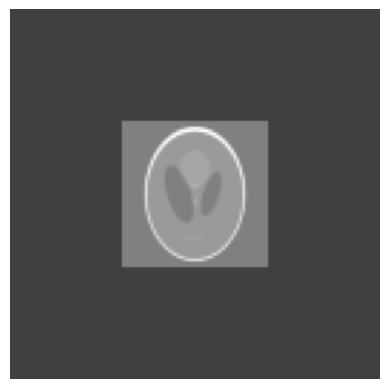

In [6]:
# Create a figure and axis
fig, ax = plt.subplots()

# Display the first image
ax.imshow(mask.real, alpha=0.5, cmap='gray')

# Overlay the second image
im = true_images[9].real
img = ax.imshow((im), alpha=.5 , cmap='gray') # np.fft.ifftshift
#plt.colorbar(img, ax=ax, label='label', cmap='gray')
# Remove axis
ax.axis('off')
#plt.colorbar(im, ax = ax)
# Show the result
plt.show()

In [7]:
x_true = true_images[1]
#x_true_vect = x_true.reshape(Nx * Ny, )
#X = [x_true_vect,  x_true_vect]
# X_true_vect = ((1. + 0.j)*np.random.normal(0.5, 0.25, size = (n, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (n, ) )
#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx, Ny, rx, ry) #sm.FourierMatrix(Nx, Ny, rx, ry) #sm.iid_stdd_Gauss(Nx, Ny, rx, ry)
#B =  list(map(lambda x: A(x), X)) #list(map(A, X))
#A(x_true_vect)
# from scipy import ndimage
# from scipy.signal import convolve2d
# from numpy.fft import fftn, ifftn, fftshift, ifftshift
'''
    MASK = ((A.Matrix) @ np.conjugate(mask.flatten())).reshape(mask.shape)

    x_trueM = (np.conjugate(A.Matrix.T) @ (X_true_vect)).reshape(mask.shape)
    x_true = (ifftn(X_true_vect.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho'))

    invFourMaskM = (np.conjugate(A.Matrix.T) @ (mask.flatten())).reshape(mask.shape)
    invFourMask = (ifftn(mask, s = (Nx,Ny), norm = 'ortho'))

    convM = (convolve2d(x_trueM, invFourMaskM, mode='same', boundary='wrap')).flatten() #reshape(Nx * Ny, ) #flatten()#
    conv = (convolve2d(x_true, invFourMask, mode='same', boundary='wrap')).flatten() #reshape(Nx * Ny, ) #flatten()#

    Four_convM = (A.Matrix @ (convM)).reshape(mask.shape) ########### THIS IS THE RIGHT MULTIPLICATION ########### (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho')).reshape(mask.shape) #
    Four_conv = (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho'))#.reshape(mask.shape)

    print()
    plt.imshow(( Four_convM - Four_conv).imag, cmap='gray') #X_true_vect.reshape(mask.shape) #conv.reshape(mask.shape) #, origin='lower' #(fftn(invFourMask.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho') )
    plt.colorbar()
    
    #print(np.linalg.norm(A.Matrix @ np.conj(A.Matrix).T - np.conj(A.Matrix).T @ A.Matrix))
    #print("A.Matrix", A.Matrix)
    #meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    #map = op.operators(algo = 'complex mirror', meas = meas, A = A)
    #map.f( x)
    #print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))
 '''

'\n    MASK = ((A.Matrix) @ np.conjugate(mask.flatten())).reshape(mask.shape)\n\n    x_trueM = (np.conjugate(A.Matrix.T) @ (X_true_vect)).reshape(mask.shape)\n    x_true = (ifftn(X_true_vect.reshape(mask.shape), s = (Nx,Ny), norm = \'ortho\'))\n\n    invFourMaskM = (np.conjugate(A.Matrix.T) @ (mask.flatten())).reshape(mask.shape)\n    invFourMask = (ifftn(mask, s = (Nx,Ny), norm = \'ortho\'))\n\n    convM = (convolve2d(x_trueM, invFourMaskM, mode=\'same\', boundary=\'wrap\')).flatten() #reshape(Nx * Ny, ) #flatten()#\n    conv = (convolve2d(x_true, invFourMask, mode=\'same\', boundary=\'wrap\')).flatten() #reshape(Nx * Ny, ) #flatten()#\n\n    Four_convM = (A.Matrix @ (convM)).reshape(mask.shape) ########### THIS IS THE RIGHT MULTIPLICATION ########### (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = \'ortho\')).reshape(mask.shape) #\n    Four_conv = (fftn(conv.reshape(mask.shape), s = (Nx,Ny), norm = \'ortho\'))#.reshape(mask.shape)\n\n    print()\n    plt.imshow(( Four_convM - Fou

#### FFT is not faithful

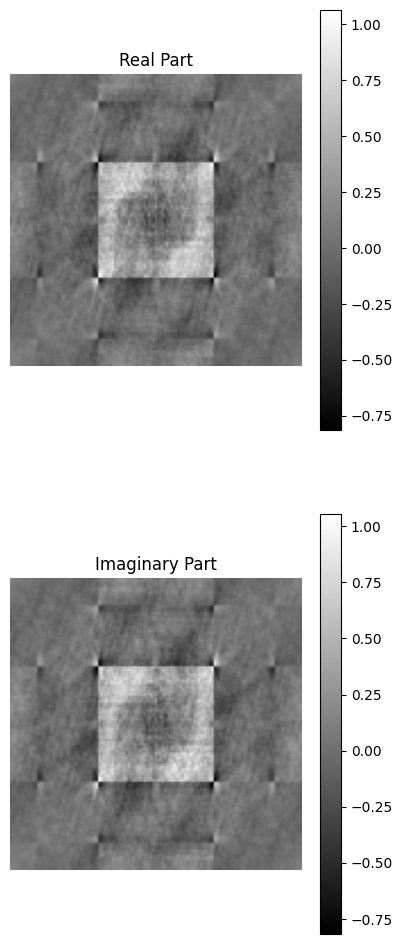

In [8]:
indices = np.logical_not(mask)
x_true = true_images[7]
#plot_im(x_true)
x_true_vect = x_true.reshape(Nx * Ny, )
meas = np.abs(A(x_true_vect)).flatten()
x =   (1 + 0j) * np.random.normal(0.75, 0.01, size = x_true.shape) + (0 + 1j) * np.random.normal(0.75, 0.01, size = x_true.shape)#x_true +
x[indices] = 0.
#plot_im(x)
Ax = A(x.reshape(Nx * Ny, )).flatten()
P_M_x = A.p_inv(meas * np.exp(1.j * np.angle(Ax))).reshape(Nx, Ny)
R_M_x = 2 * P_M_x - x
plot_im(R_M_x) #Ax.reshape(Nx, Ny)
#plot_im(meas.reshape(Nx, Ny))


In [9]:
############### attempt to make mirror descent faster: use fft to compute gradients. what is the right formula? ############
'''
    noise_lvl = 0.e-1
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    map = op.operators(algo = 'real mirror', meas = meas, A = A, mask = mask)
    x = 4*(((1. + 0.j)*np.random.normal(0.5, 0.25, size = (n, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (n, ) ))

    grad_f_x = np.asarray(map.grad_f(x))
    def grad_fFast(x): #Wirtinger derivative, fast matrix form #theirs _new
        z =  (fftn(np.conj(x.reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() #self.A(x) #(A.Matrix) @ np.conjugate(x) ########## Done
        y = np.conjugate(A.Matrix) @ x
        a =  ( A.Matrix).T @ ( y*( z * np.conjugate(z) - meas)) #(ifftn(((y*( z * np.conjugate(z) - meas)).reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() ####### Not yet done
        m = len(meas) 
        return a / (1*m)
    grad_fFast_x =grad_fFast(x)
    np.linalg.norm(grad_f_x - grad_fFast_x)
'''

"\n    noise_lvl = 0.e-1\n    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()\n    map = op.operators(algo = 'real mirror', meas = meas, A = A, mask = mask)\n    x = 4*(((1. + 0.j)*np.random.normal(0.5, 0.25, size = (n, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (n, ) ))\n\n    grad_f_x = np.asarray(map.grad_f(x))\n    def grad_fFast(x): #Wirtinger derivative, fast matrix form #theirs _new\n        z =  (fftn(np.conj(x.reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() #self.A(x) #(A.Matrix) @ np.conjugate(x) ########## Done\n        y = np.conjugate(A.Matrix) @ x\n        a =  ( A.Matrix).T @ ( y*( z * np.conjugate(z) - meas)) #(ifftn(((y*( z * np.conjugate(z) - meas)).reshape(mask.shape)), s = mask.shape, norm = 'ortho')).flatten() ####### Not yet done\n        m = len(meas) \n        return a / (1*m)\n    grad_fFast_x =grad_fFast(x)\n    np.linalg.norm(grad_f_x - grad_fFast_x)\n"

In [10]:
(Qx, Qy) = int(rx * Nx), int(ry * Ny)
m = Qx * Qy
X = 4*(((1. + 0.j)*np.random.normal(0.5, 0.25, size = (m, ) )) +  (0. + 1.j)*np.random.normal(0.5, 0.25, size = (m, ) ))
A.p_inv(X)

array([  2.57647764e+02 +2.59209244e+02j,
        -6.75556850e-02 +1.78879936e-01j,
        -9.33599423e-01 +1.26571611e+00j, ...,
         6.70665864e-01 -4.24828910e-01j,
        -1.26116103e-01 -1.89796418e-01j,
         4.14903137e-01 -1.13240550e+00j])

In [11]:

#A_pinv = np.linalg.pinv(A.Matrix) # A is full rank and unital. So use A_pinv = A* to be faster

In [12]:
# x_true = (ifftn(X_true_vect.reshape(mask.shape), s = (Nx,Ny), norm = 'ortho')).flatten()
# x = A_pinv @ X_true_vect
# np.linalg.norm(x_true - x)

In [13]:
import odl
print(odl.__version__)
import solve

0.7.0


In [14]:
# X = A.Matrix @ np.conjugate(x_true_vect)
# B = np.conj(A.Matrix)
# Xa = A.Matrix @ ((A_pinv) @ X)
# I = A.Matrix @ A_pinv
#print('A', A.Matrix)
#print('A_pinv', A_pinv)
#print('A.T', A.Matrix.T)
#print(np.linalg.norm(X - Xa))

In [15]:
#FMPE0, FMPE1, FMPE2 = [], [], []
#from DisplaysFast import phase_retrie_plots

Noise to Signal Ratio (in the 2-norm) : 0.0
Noise to Signal Ratio (in the initialization) : 0.613097442069
 noise not to fit :  0.0
iteration k 0
 noise not to fit :  0.0
iteration k 0
 noise not to fit :  0.0
iteration k 0


c:\Users\NICK-TECH\miniconda3\envs\phase\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\NICK-TECH\miniconda3\envs\phase\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


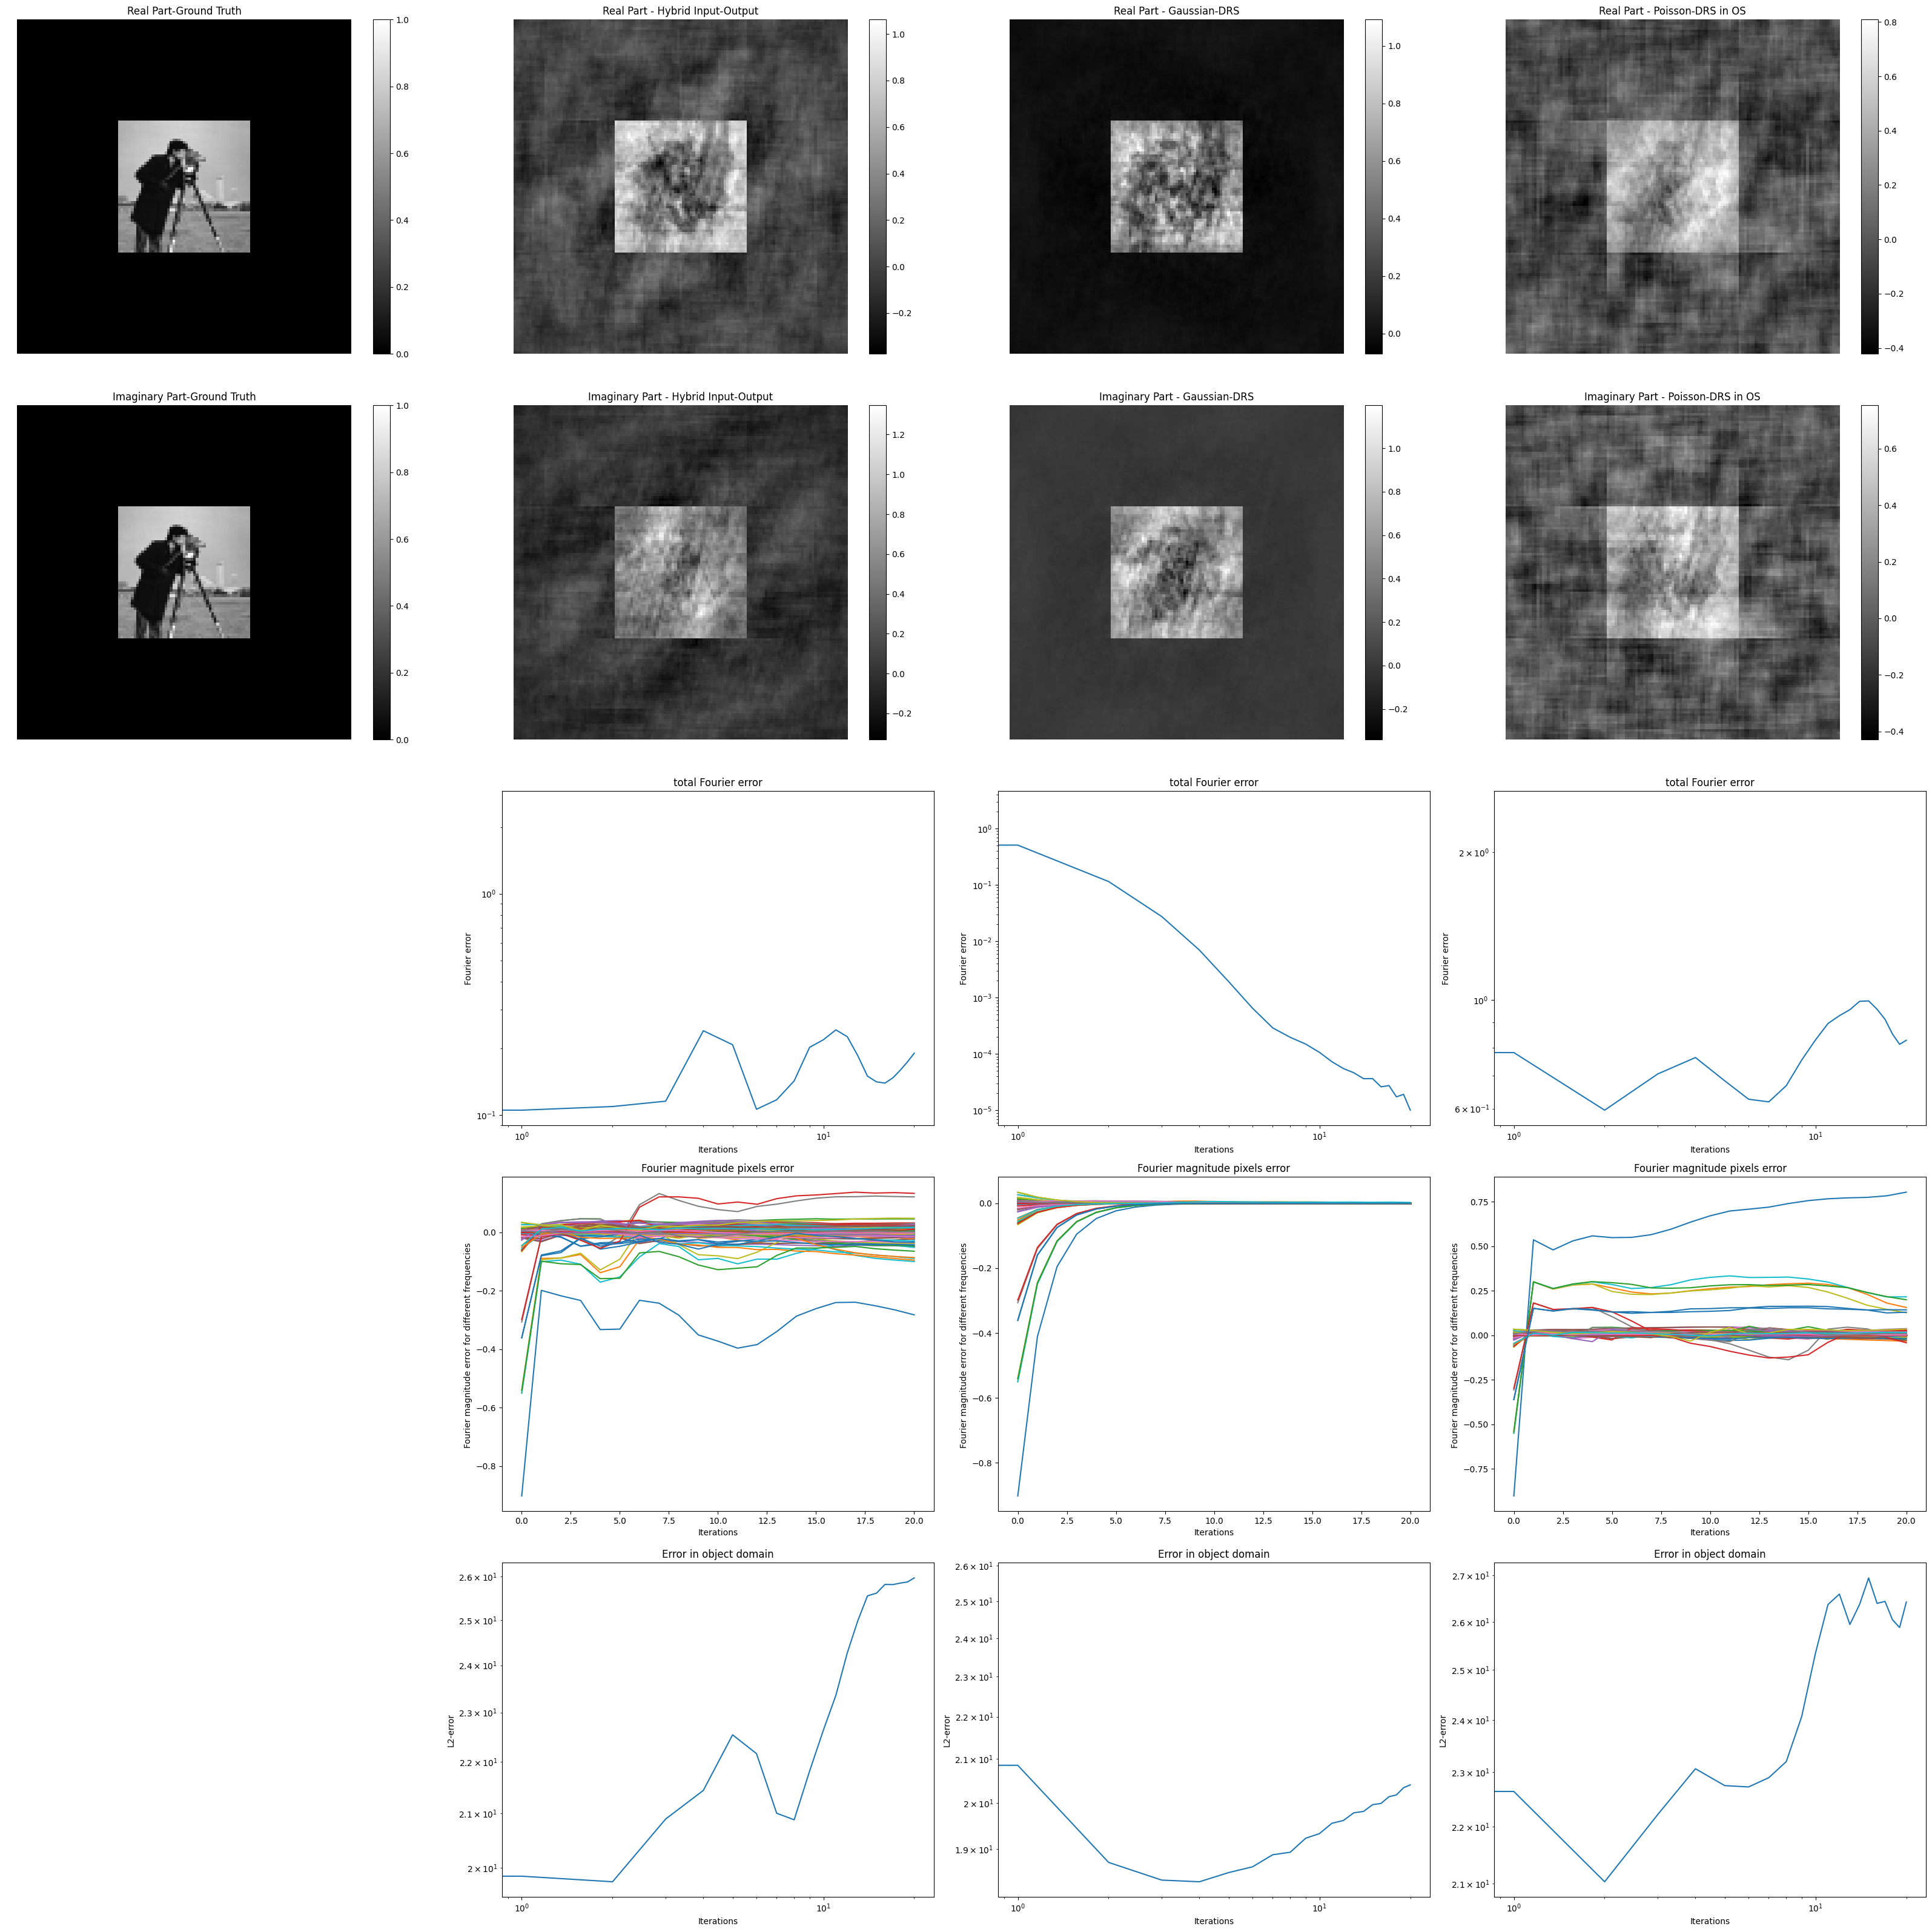

In [16]:
idx = [7]# 1, 8, 7 np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos_group = []
Algos = ['real mirror', 'complex mirror', 'Hybrid Input-Output']
#Algos_group.append(Algos)
Algos = ['No Support prior - fast', 'Gerchberg-Saxton', 'Error Reduction : support prior'] # 'Output-Output'   'Error Reduction + TV-support' 'Gerchberg-Saxton' 'basic Input-Output'
#Algos_group.append(Algos)
Algos = [ 'Gerchberg-Saxton', 'Error Reduction : support prior', 'Hybrid Input-Output'] # 'Output-Output' $\beta = 0$ gives 'No support prior' Algo
#Algos_group.append(Algos)
Algos = [ 'Peaceman-Rachford RMRS', 'Peaceman-Rachford RSRM', 'RAAR'] # 'Output-Output' $\beta = 0$ gives 'No support prior' Algo
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'new Hybrid Input-Output', 'Averaged Alternating Reflections RSRM' ] #,  'Hybrid Input-Output + TV'
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'RAAR',  'Gaussian-DRS'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Averaged Alternating Reflections RMRS', 'Gaussian-DRS' ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM', 'Averaged Alternating Reflections RMRS', 'Poisson-DRS in OS'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = [ 'Hybrid Input-Output', 'Gaussian-DRS', 'Poisson-DRS in OS'  ]  #'Poisson-DRS in OS' 'Averaged Alternating Reflections RMRS', 'Gaussian-DRS', #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RMRS + M_TVS', 'Gaussian-DRS + M_TVS', 'Poisson-DRS in OS + M_TVS'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RMRS + TVS_M', 'Gaussian-DRS + TVS_M', 'Poisson-DRS in OS + TVS_M'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Averaged Alternating Reflections RMRS', 'Gaussian-DRS' ] #, 'RAAR'  .ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Averaged Alternating Reflections RMRS', 'Averaged Alternating Reflections RSRM' ] #, 'RAAR'  .ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Averaged Alternating Reflections RSRM', 'Averaged Alternating Reflections RSRM + TV1' ] #, 'RAAR'  .ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RMRS + TV1', 'Gaussian-DRS + TV1', 'Poisson-DRS in OS + TV1'  ] #ER and Gaussian [1, 0.5] produce similar images but errors are not exactly the same
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Hybrid Input-Output real', 'Averaged Alternating Reflections RSRM' ]  #,  'Averaged Alternating Reflections RSRM', 'Gaussian-DRS' 'Peaceman-Rachford'                            #, 'Gerchberg-Saxton + TV-support', 'Error Reduction + TV-support'                      #TV-support alsmost kills the real part and make Gerchberg-Saxton worse
#Algos_group.append(Algos)                 #'No Support prior + TV-support real_imag_separated' 'No Support prior + TV-support',
#Algos = ['Poisson-DRS',  'Averaged Alternating Reflections RSRM', 'Averaged Alternating Reflections RMRS' ] #RSRM and RMRS produce similar images but error looks very different
#Algos_group.append(Algos)
Algos = ['Poisson-DRS', 'Gaussian-DRS + TV1', 'Poisson-DRS in OS + TV1' ] # , 'Hybrid Input-Output' 'No Support prior', 'Gerchberg-Saxton', 'Error Reduction', 'real mirror', 'complex mirror', 
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM', 'Gaussian-DRS', 'Poisson-DRS in OS'  ] # , 'Hybrid Input-Output' 'No Support prior', 'Gerchberg-Saxton', 'Error Reduction', 'real mirror', 'complex mirror', 
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM',   'Gaussian-DRS', 'Poisson-DRS in OS'] #'Poisson-DRS + TV','Averaged Alternating Reflections RSRM', 'Gaussian-DRS',  'Poisson-DRS' #'Averaged Alternating Reflections', 'real mirror' , 'complex mirror'  'Poisson-DRS' 'Poisson-DRS' 'Error Reduction : support prior'
#Algos_group.append(Algos)
Algos = ['Averaged Alternating Reflections RSRM', 'RAAR',  'Gaussian-DRS'] #'Poisson-DRS + TV','Averaged Alternating Reflections RSRM', 'Gaussian-DRS',  'Poisson-DRS' #'Averaged Alternating Reflections', 'real mirror' , 'complex mirror'  'Poisson-DRS' 'Poisson-DRS' 'Error Reduction : support prior'
#Algos_group.append(Algos)
Algos = ['Hybrid Input-Output', 'Averaged Alternating Reflections RSRM', 'Averaged Alternating Reflections RMRS' ] #'Poisson-DRS + TV','Averaged Alternating Reflections RSRM', 'Gaussian-DRS',  'Poisson-DRS' #'Averaged Alternating Reflections', 'real mirror' , 'complex mirror'  'Poisson-DRS' 'Poisson-DRS' 'Error Reduction : support prior'
#Algos_group.append(Algos)
for Algos in Algos_group:
    for i in idx:
        X_sols = []
        x_true = true_images[i]
        x_true_vect = x_true.reshape(Nx * Ny, )
        maxiter = 20
        kappa  = 100000
        xi = 12
        noise_lvl = 0.00 #1000 # represents deviation for Gaussian noise. 
                        #But, for Poisson noise, the higher it is (to infinity), the less noisy is the data,
                        #because it is inversely proportional to the variance around the true data. #at pixel level
        noise_lvl_init = 0.01 #amplitude noise #If not 0, iterative projections algo: ER, HIO, even AAR stagnate at local minima. error is 1e-7 instead of 1e-37 for instance
        meas, noise, NSR = me.gauss_noisy_meas(x_true_vect, noise_lvl**(1) , A)()   # NSR in terms of total L2 norm  #me.gauss_noisy_meas #poiss_noisy_meas
        print('Noise to Signal Ratio (in the 2-norm) :', NSR) 
        meas = meas.flatten()
        #print("meas", meas)
        init =  'Gaussian'#'close' # 'spectral' #
        x0, init_NSR = op.initialise(n, meas, A.Matrix, type = init, real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl_init**(0.5) ) 
        print('Noise to Signal Ratio (in the initialization) :', init_NSR)
        #plot_im(x0.reshape(Nx, Ny))
        for Algo in Algos:
            map = op.operators(algo = Algo, meas = meas, A = A, mask = mask)
            print(' noise not to fit : ', map.f(x_true_vect)) 
            #print('grad', np.asarray(map.grad_f(1 + x_true_vect)))
            x_sols, space = solve.phase_retrieval(noise, kappa, xi, Algo, map, mask, n, A,  A.Matrix, A.p_inv, meas, maxiter, x0, 
                                                  x_true_vect, IO_OO_HIO_newHIO_beta = [1, .6, 1., [.25, .25, .5]], 
                                                  RAAR_AAR_beta = [.5, .5], TvIter = 10, TvAlpha = 0.005, rho_Gau_Poi = [[1, 0.5], [1, 0.5]] ) #Gaussion rho = .5 outperforms AAR
                                                                                    
                                                                                                                #np.conj(A.Matrix).T #TvAlpha = 0.045 # poisson TvAlpha =0.02 #  Don't regularise Fourier
            #print(x_sols)
            X_sols.append(x_sols)
        phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter, space, Algos ) #FMPE0, FMPE1, FMPE2 =

In [35]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

def create_video(image_sequence_real, image_sequence_imag, output_file, fps=10):
    assert len(image_sequence_real) == len(image_sequence_imag), "Real and imaginary sequences must have the same length"

    height, width = image_sequence_real[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_file, fourcc, fps, (width*2, height)) # width*2 for real and imaginary parts side by side

    for real_part, imag_part in zip(image_sequence_real, image_sequence_imag):
        norm_imag_part = imag_part # cv2.normalize(imag_part, None, 0, 255, cv2.NORM_MINMAX)
        #norm_imag_part = cv2.normalize(imag_part, None, 0, 255, cv2.NORM_MINMAX)
        combined_image = np.hstack((real_part, norm_imag_part))
        combined_image = cv2.cvtColor(combined_image.astype('uint8'), cv2.COLOR_GRAY2BGR)
        out.write(combined_image)

    out.release()

class VideoPlayer:
    def __init__(self, root, video_file, zoom_factor=2):
        self.root = root
        self.cap = cv2.VideoCapture(video_file)
        self.paused = True
        self.frame = None
        self.current_frame = 0
        self.total_frames = int(self.cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.zoom_factor = zoom_factor
        self.root.title("Video Player")

        self.video_label = tk.Label(root)
        self.video_label.pack()

        self.play_pause_button = ttk.Button(root, text="Play/Pause", command=self.toggle_pause)
        self.play_pause_button.pack(side=tk.LEFT)
        self.quit_button = ttk.Button(root, text="Quit", command=root.quit)
        self.quit_button.pack(side=tk.RIGHT)

        self.scale = tk.Scale(root, from_=0, to=self.total_frames - 1, orient=tk.HORIZONTAL, length=600, command=self.on_scale)
        self.scale.pack()

        self.speed_label = tk.Label(root, text="Speed (ms per frame):")
        self.speed_label.pack(side=tk.LEFT)
        self.speed_var = tk.IntVar(value=100)
        self.speed_entry = tk.Entry(root, textvariable=self.speed_var, width=5)
        self.speed_entry.pack(side=tk.LEFT)

        self.root.after(0, self.update_frame)

    def toggle_pause(self):
        self.paused = not self.paused

    def update_frame(self):
        if not self.paused and self.current_frame < self.total_frames:
            ret, self.frame = self.cap.read()
            if ret:
                self.frame = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
                self.frame = cv2.resize(self.frame, (self.frame.shape[1] * self.zoom_factor, self.frame.shape[0] * self.zoom_factor))
                self.frame = Image.fromarray(self.frame)
                self.photo = ImageTk.PhotoImage(image=self.frame)
                self.video_label.configure(image=self.photo)
                self.current_frame += 1
                self.scale.set(self.current_frame)

        speed = self.speed_var.get()
        self.root.after(speed, self.update_frame)

    def on_scale(self, value):
        self.current_frame = int(value)
        self.cap.set(cv2.CAP_PROP_POS_FRAMES, self.current_frame)
        ret, self.frame = self.cap.read()
        if ret:
            self.frame = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
            self.frame = cv2.resize(self.frame, (self.frame.shape[1] * self.zoom_factor, self.frame.shape[0] * self.zoom_factor))
            self.frame = Image.fromarray(self.frame)
            self.photo = ImageTk.PhotoImage(image=self.frame)
            self.video_label.configure(image=self.photo)

    def on_closing(self):
        self.cap.release()
        self.root.destroy()

In [53]:
# Example usage
ope = odl.FlatteningOperator(space)

image_sequence_real = [ope.inverse(x).real * 255 for x in X_sols[-3] ] #[np.random.rand(480, 640) * 255 for _ in range(10)]  # Replace with your real part images
image_sequence_imag = [ope.inverse(x).imag * 255 for x in X_sols[-3] ]#[np.random.rand(480, 640) for _ in range(10)]       # Replace with your imaginary part images

# Create video
output_file = 'AAR RMRS + M_TVS, Fourier A, noiseless, 500 iter.avi'
#'AAR RMRS M_TVS , random A, Poisson NSR = 0.049, 500 iter'                  #'AAR RMRS + TV1, random A, Poisson NSR = 0.049 , 100 iter'
#Averaged Alternating Reflections RSRM, Fourier A, noiseless , 1000 iter  # 'AAR RSRM , random A, Poisson NSR = 0.05, 500 iter'
#Averaged Alternating Reflections RMRS, Gauss posi init , Fourier A, noiseless , 1000 iter

#HIO, Gauss posi init , Fourier A, noiseless , 1000 iter

#'Gaussian DRS M_TVS, random A, Poisson NSR = 0.049 , 500 iter'              #'Gaussian DRS + TV1, random A, Poisson NSR = 0.049 , 100 iter'
# Gaussian DRS, Fourier A, noiseless , 500 iter, close init
# Gaussian DRS, Fourier A, noiseless , 1000 iter

#'Poisson DRS M_TVS rho = 0.5, random A, Poisson NSR = 0.049 , 500 iter'     #'Poisson DRS + TV1 rho = 0.5, random A, Poisson NSR = 0.049 , 100 iter'
#'Poisson DRS in OS + TV1 rho = 0.5, random A, Poisson NSR = 0.051 , 100 iter'  #'Poisson DRS in OS, rho = 1, Fourier A, noiseless , 500 iter, close init, NSR = 0.25.avi'
create_video(image_sequence_real, image_sequence_imag, output_file, fps=10)

In [54]:
root = tk.Tk()
player = VideoPlayer(root, output_file, zoom_factor=5)  # Increase zoom_factor for more zoom
root.mainloop()

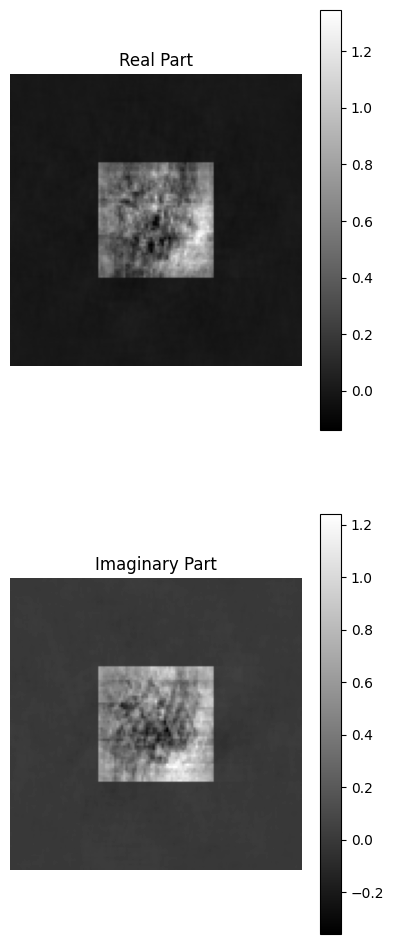

In [34]:
ope = odl.FlatteningOperator(space)
#plt.plot( x_sol.real, vmin=np.min(x_sol.real), vmax=np.max(x_sol.real))
fig = plt.figure(figsize=(16,12))

x_sol = ope.inverse(X_sols[-2][-1])

axs01 = plt.subplot2grid((2,3), (0,1))
im01 = axs01.imshow(x_sol.real,  cmap='gray', vmin=np.min(x_sol.real), vmax=np.max(x_sol.real))
axs01.set_title('Real Part')
plt.colorbar(im01, ax = axs01)
axs01.axis('off')
axs11 = plt.subplot2grid((2,3), (1,1))
im11 = axs11.imshow(x_sol.imag,  cmap='gray', vmin=np.min(x_sol.imag), vmax=np.max(x_sol.imag))
plt.colorbar(im11, ax = axs11)
axs11.set_title('Imaginary Part')
axs11.axis('off')

x_sol = ope.inverse(X_sols[-2][-2])


Noise to Signal Ratio (in the 2-norm) : 0.0
Noise to Signal Ratio (in the initialization) : 0.589297227011
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0
iteration k 0


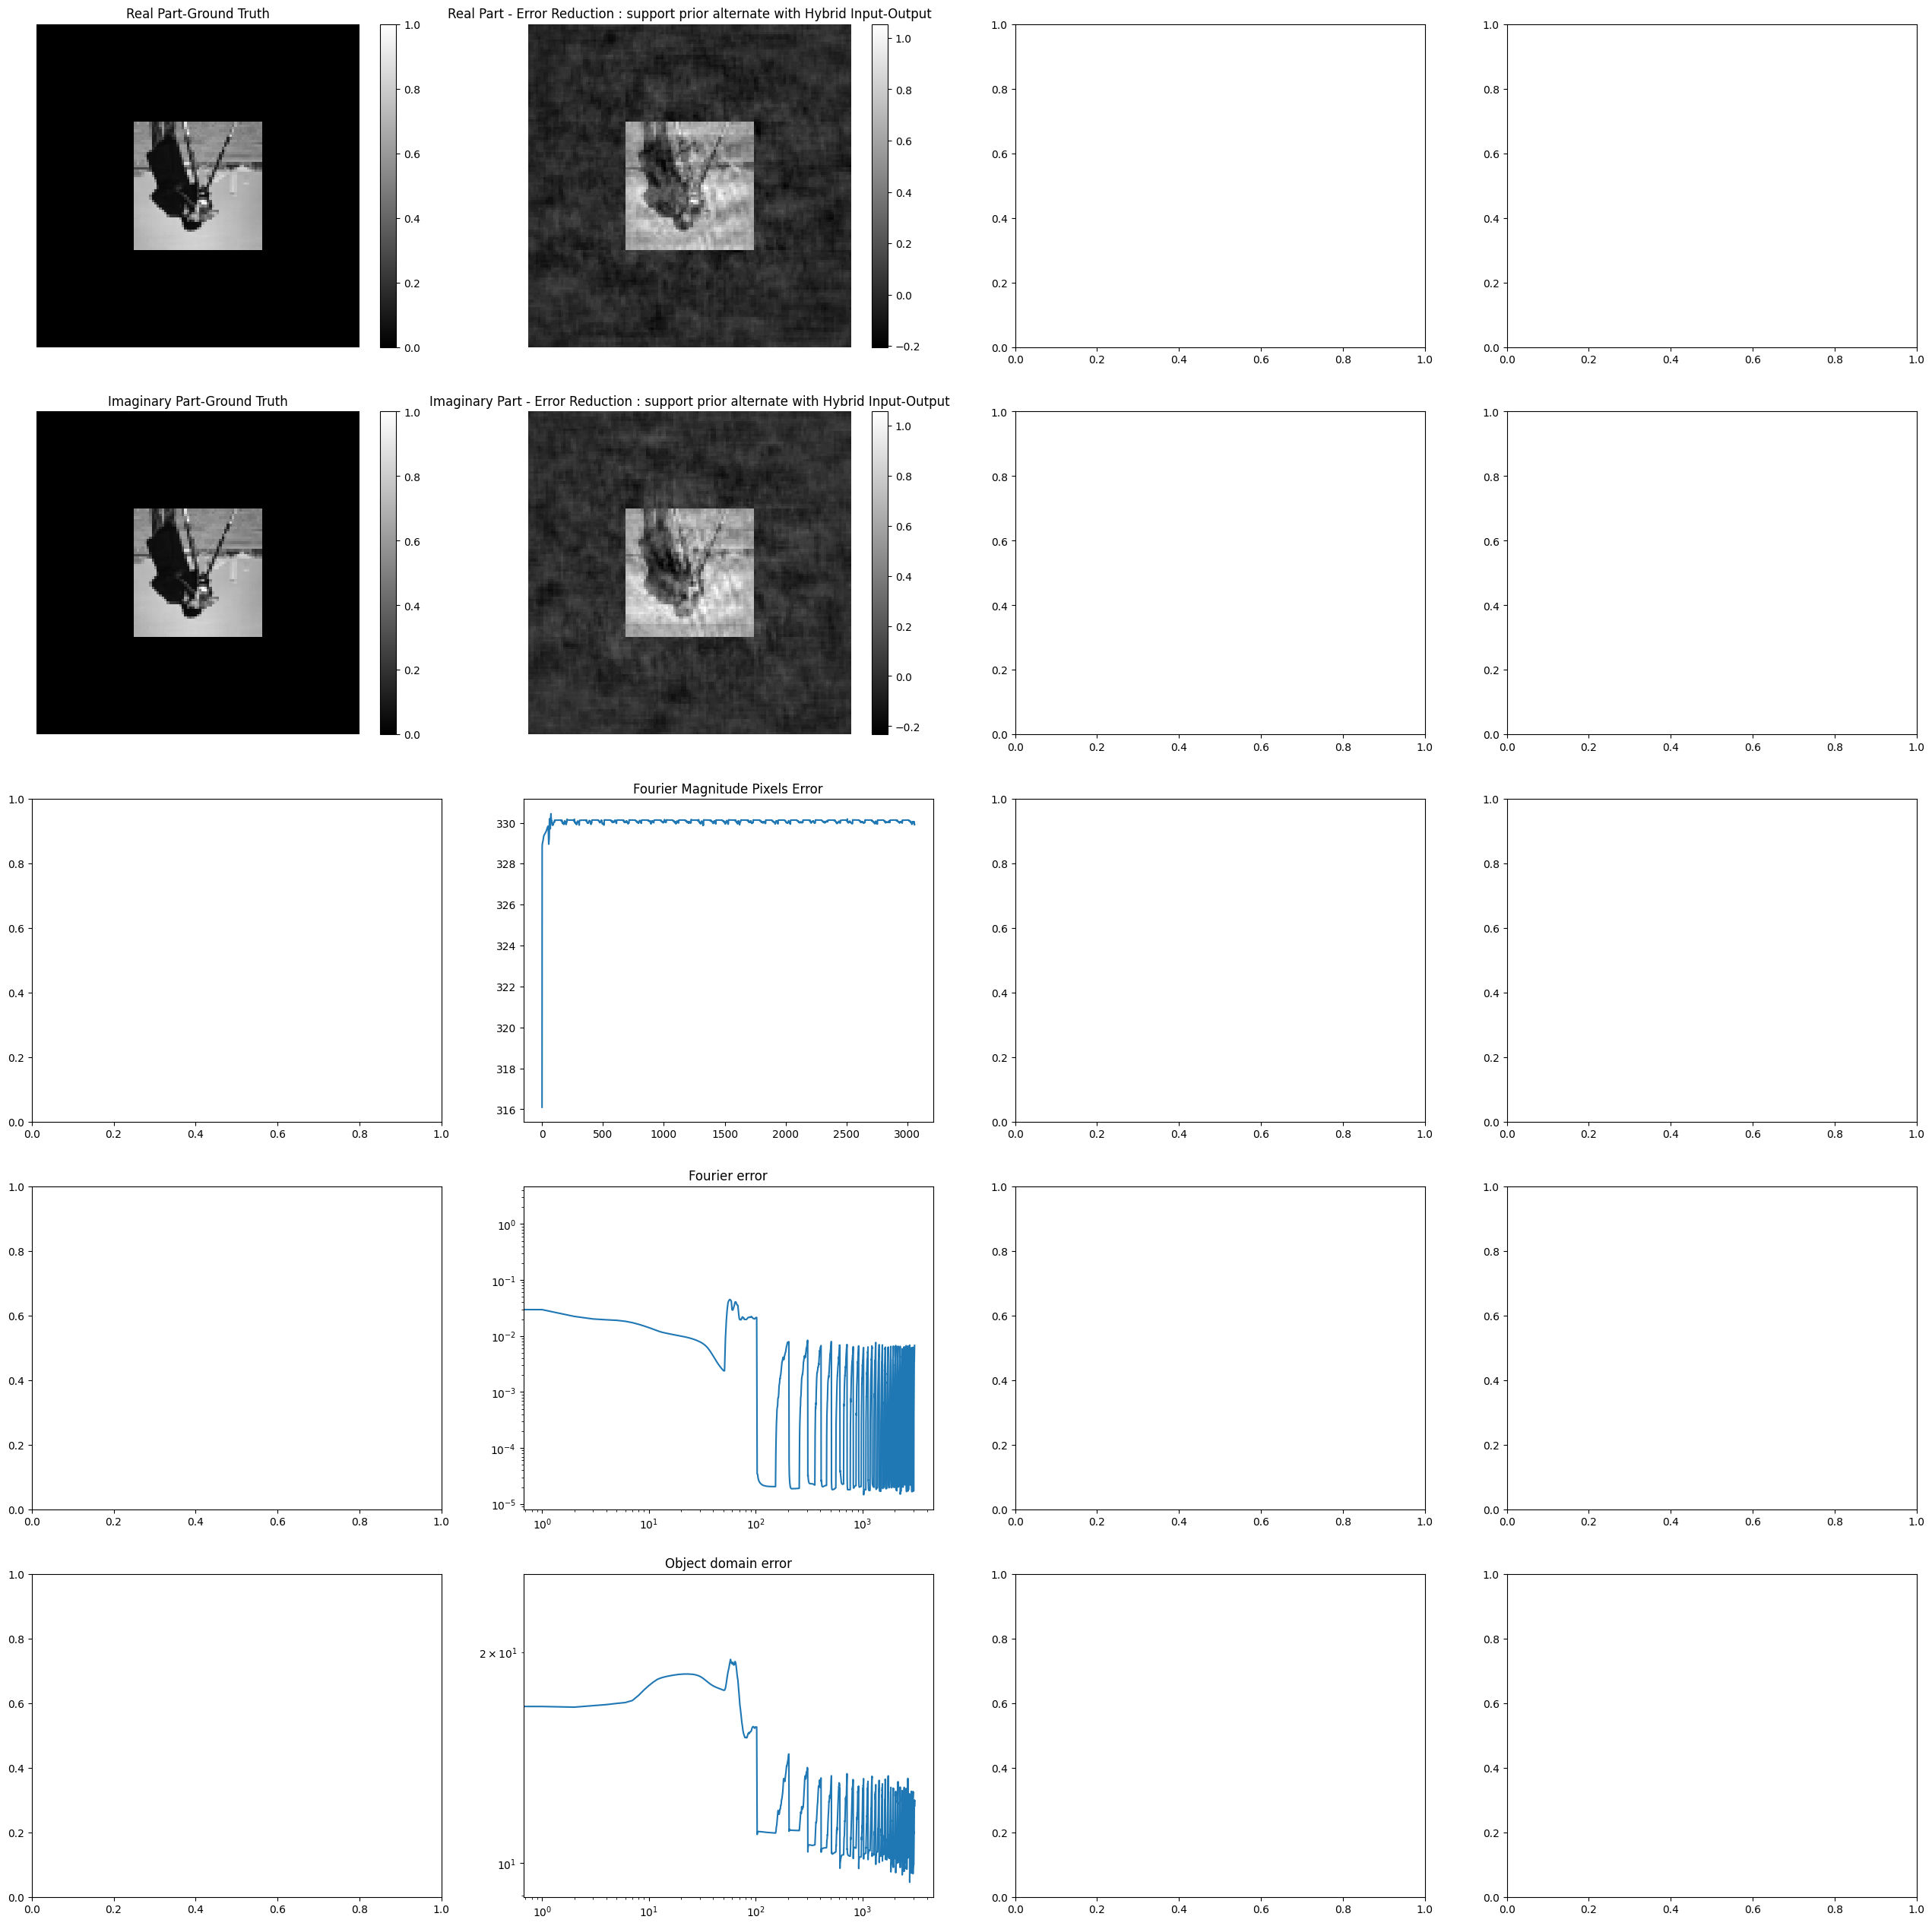

In [26]:
from DisplayAlternateFast import phase_retrie_plots_alternate
idx = [7]#1, 8, 7 np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos = [  'Error Reduction : support prior',  'Hybrid Input-Output'] #'Hybrid Input-Output' 'Error Reduction : support prior'
for i in idx:
    X_sols = []
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 50
    kappa  = 0.9
    xi = 12
    noise_lvl = .00 # represents deviation for Gaussian noise. 
                    #But, for Poisson noise, the higher it is (to infinity), the less noisy is the data,
                    #because it is inversely proportional to the variance around the true data. #at pixel level
    noise_lvl_init = 0.
    meas, noise, NSR = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    print('Noise to Signal Ratio (in the 2-norm) :', NSR)
    meas = meas.flatten()
    #L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    #Sols_list = []
    x0, init_NSR = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl_init**(0.5) )
    print('Noise to Signal Ratio (in the initialization) :', init_NSR)
    for epoch in range(30):

        for Algo in Algos:
            map = op.operators(algo = Algo, meas = meas, A = A, mask = mask) 
            x_sols, space = solve.phase_retrieval(noise, kappa, xi, Algo, map, mask, n, A, A.Matrix, A.p_inv, meas, maxiter, x0, 
                                                  x_true_vect, IO_OO_HIO_newHIO_beta = [1, .6, 1., [.25, .25, .5]], RAAR_AAR_beta = [1., .5], TvIter = 10, TvAlpha = 0.005, rho_Gau_Poi = [[1, 0.5], [0, .1]] ) #Gaussion rho = .5 outperforms AAR
                                                 
            x0 = x_sols[-1]
            X_sols.extend(x_sols)
    x_sols, space = solve.phase_retrieval(noise, kappa, xi, 'Error Reduction : support prior', map, mask, n, A, A.Matrix, A.p_inv, meas, maxiter, x0, 
                                          x_true_vect, IO_OO_HIO_newHIO_beta = [1, .6, 1., [.25, .25, .5]], RAAR_AAR_beta = [1., .5], TvIter = 0, TvAlpha = 0.000, rho_Gau_Poi = [[0., .5], [0, .1]] )  
    #X_sols.append(Sols_list)
    phase_retrie_plots_alternate(i, true_images, X_sols, map, A, meas,  space, Algos) #maxiter,

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

def create_color_bar(height, width=20):
    gradient = np.linspace(0, 255, height, dtype=np.uint8).reshape(height, 1)
    color_bar = np.repeat(gradient, width, axis=1)
    color_bar_rgb = cv2.applyColorMap(color_bar, cv2.COLORMAP_JET)
    return color_bar_rgb

def create_video(image_sequence_real, image_sequence_imag, output_file, fps=10):
    assert len(image_sequence_real) == len(image_sequence_imag), "Real and imaginary sequences must have the same length"

    height, width = image_sequence_real[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_file, fourcc, fps, (width*2 + 40, height)) # width*2 for real and imaginary parts side by side + 40 for color bars

    color_bar_real = create_color_bar(height)
    color_bar_imag = create_color_bar(height)
    
    for real_part, imag_part in zip(image_sequence_real, image_sequence_imag):
        norm_real_part = cv2.normalize(real_part, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        norm_imag_part = cv2.normalize(imag_part, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        
        combined_image = np.hstack((norm_real_part, norm_imag_part))
        combined_image = cv2.cvtColor(combined_image, cv2.COLOR_GRAY2BGR)

        # Add color bars next to the images
        combined_image_with_colorbars = np.hstack((combined_image, color_bar_real, color_bar_imag))

        out.write(combined_image_with_colorbars)

    out.release()

class VideoPlayer:
    def __init__(self, root, video_file, zoom_factor=2):
        self.root = root
        self.cap = cv2.VideoCapture(video_file)
        self.paused = True
        self.frame = None
        self.current_frame = 0
        self.total_frames = int(self.cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.zoom_factor = zoom_factor
        self.root.title("Video Player")

        self.video_label = tk.Label(root)
        self.video_label.pack()

        self.play_pause_button = ttk.Button(root, text="Play/Pause", command=self.toggle_pause)
        self.play_pause_button.pack(side=tk.LEFT)
        self.quit_button = ttk.Button(root, text="Quit", command=root.quit)
        self.quit_button.pack(side=tk.RIGHT)

        self.scale = tk.Scale(root, from_=0, to=self.total_frames - 1, orient=tk.HORIZONTAL, length=600, command=self.on_scale)
        self.scale.pack()

        self.speed_label = tk.Label(root, text="Speed (ms per frame):")
        self.speed_label.pack(side=tk.LEFT)
        self.speed_var = tk.IntVar(value=100)
        self.speed_entry = tk.Entry(root, textvariable=self.speed_var, width=5)
        self.speed_entry.pack(side=tk.LEFT)

        self.root.after(0, self.update_frame)

    def toggle_pause(self):
        self.paused = not self.paused

    def update_frame(self):
        if not self.paused and self.current_frame < self.total_frames:
            ret, self.frame = self.cap.read()
            if ret:
                self.frame = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
                self.frame = cv2.resize(self.frame, (self.frame.shape[1] * self.zoom_factor, self.frame.shape[0] * self.zoom_factor))
                self.frame = Image.fromarray(self.frame)
                self.photo = ImageTk.PhotoImage(image=self.frame)
                self.video_label.configure(image=self.photo)
                self.current_frame += 1
                self.scale.set(self.current_frame)

        speed = self.speed_var.get()
        self.root.after(speed, self.update_frame)

    def on_scale(self, value):
        self.current_frame = int(value)
        self.cap.set(cv2.CAP_PROP_POS_FRAMES, self.current_frame)
        ret, self.frame = self.cap.read()
        if ret:
            self.frame = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
            self.frame = cv2.resize(self.frame, (self.frame.shape[1] * self.zoom_factor, self.frame.shape[0] * self.zoom_factor))
            self.frame = Image.fromarray(self.frame)
            self.photo = ImageTk.PhotoImage(image=self.frame)
            self.video_label.configure(image=self.photo)

    def on_closing(self):
        self.cap.release()
        self.root.destroy()

# Generate synthetic image sequences
def generate_synthetic_images(num_frames, height, width):
    images_real = []
    images_imag = []
    for i in range(num_frames):
        real_image = np.sin(np.linspace(0, 2 * np.pi, height) + i / 5.0).reshape(height, 1) * np.ones((1, width))
        imag_image = np.cos(np.linspace(0, 2 * np.pi, height) + i / 5.0).reshape(height, 1) * np.ones((1, width))
        images_real.append((real_image * 255).astype('uint8'))
        images_imag.append((imag_image * 255).astype('uint8'))
    return images_real, images_imag

# Create synthetic images
num_frames = 30
height, width = 100, 100
images_real, images_imag = generate_synthetic_images(num_frames, height, width)

# Create video
output_file = 'synthetic_video3.avi'
create_video(images_real, images_imag, output_file, fps=10)

# Play the video using VideoPlayer class
root = tk.Tk()
player = VideoPlayer(root, output_file, zoom_factor=2)
root.mainloop()
